In [9]:
import numpy as np
import math
import time
import numpy.linalg as npl
import matplotlib.pyplot as plt

/var/folders/_b/f62_3kh151x02tlww4dcpdtr0000gn/T/ipykernel_79231/3308479613.py:44: RuntimeWarning: divide by zero encountered in double_scalars
  RL2 = np.abs(np.log2(L2 / L2prev))
/var/folders/_b/f62_3kh151x02tlww4dcpdtr0000gn/T/ipykernel_79231/3308479613.py:45: RuntimeWarning: divide by zero encountered in double_scalars
  RInf = np.abs(np.log2(LInf / Infprev))


N = 2 Время: 0.01912689208984375  Обусловленность матрицы: 8.929505e+01  L2 = 3.801884e-03 Inf = 4.773834e-03 Сходимость L2 inf Сходимость Inf inf


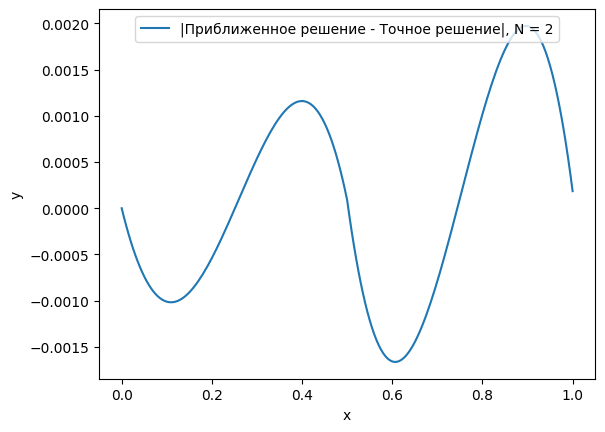

<Figure size 7680x5760 with 0 Axes>

N = 4 Время: 0.007837057113647461  Обусловленность матрицы: 3.130944e+02  L2 = 4.682325e-04 Inf = 6.071106e-04 Сходимость L2 3.021417e+00 Сходимость Inf 2.975117e+00


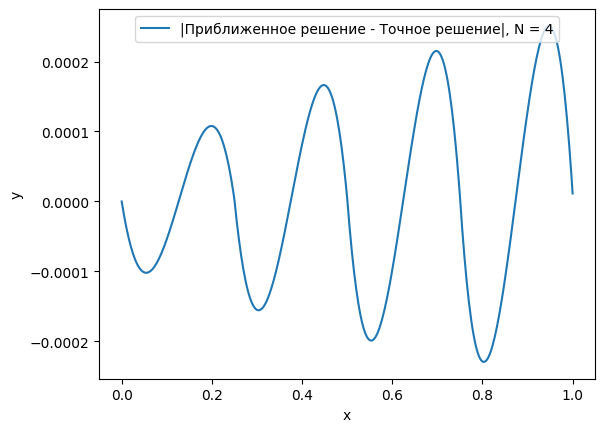

<Figure size 7680x5760 with 0 Axes>

N = 8 Время: 0.010718107223510742  Обусловленность матрицы: 1.111417e+03  L2 = 5.833336e-05 Inf = 7.603189e-05 Сходимость L2 3.004832e+00 Сходимость Inf 2.997283e+00


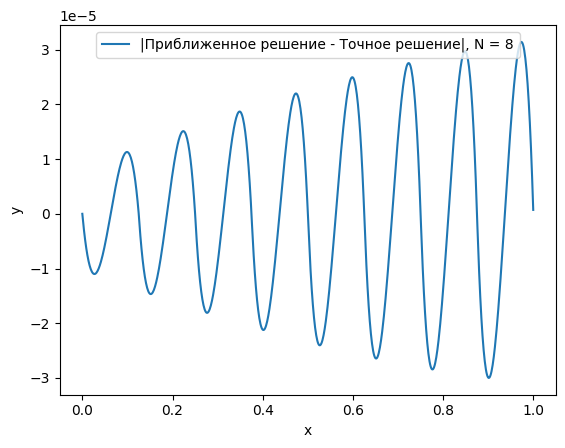

<Figure size 7680x5760 with 0 Axes>

N = 16 Время: 0.022482872009277344  Обусловленность матрицы: 4.104305e+03  L2 = 7.286786e-06 Inf = 9.495840e-06 Сходимость L2 3.000967e+00 Сходимость Inf 3.001237e+00


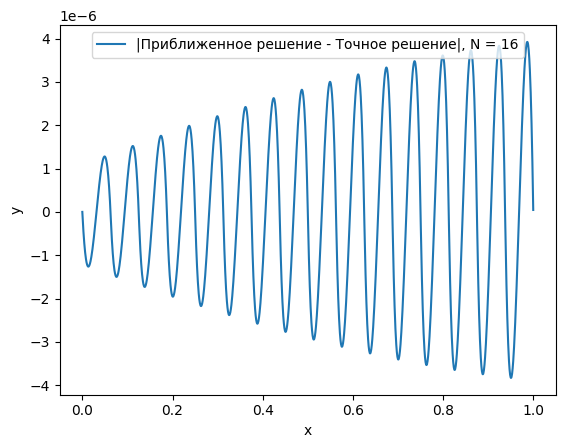

<Figure size 7680x5760 with 0 Axes>

N = 32 Время: 0.0379178524017334  Обусловленность матрицы: 1.567289e+04  L2 = 9.107711e-07 Inf = 1.185920e-06 Сходимость L2 3.000122e+00 Сходимость Inf 3.001289e+00


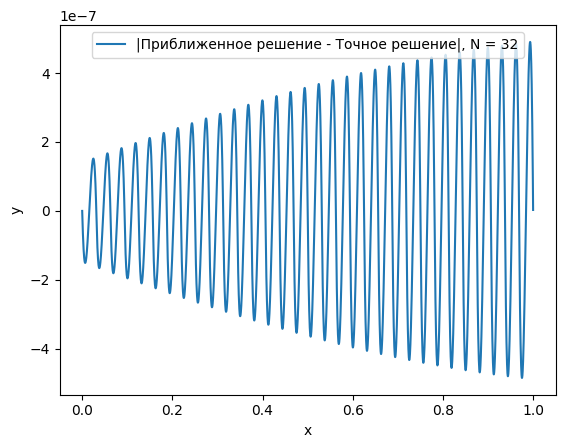

<Figure size 7680x5760 with 0 Axes>

N = 64 Время: 0.08144116401672363  Обусловленность матрицы: 6.114072e+04  L2 = 1.138487e-07 Inf = 1.481565e-07 Сходимость L2 2.999971e+00 Сходимость Inf 3.000813e+00


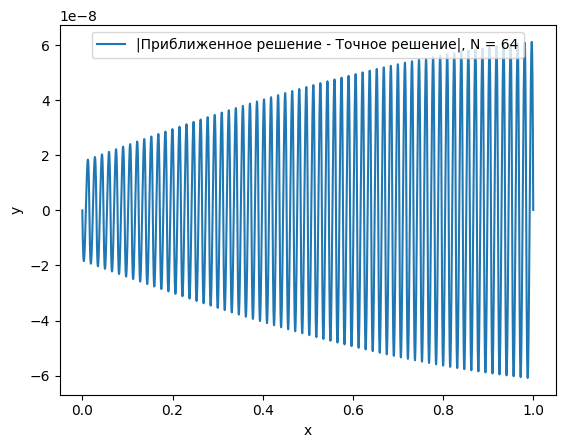

<Figure size 7680x5760 with 0 Axes>

N = 128 Время: 0.19983696937561035  Обусловленность матрицы: 2.413989e+05  L2 = 1.423148e-08 Inf = 1.852153e-08 Сходимость L2 2.999960e+00 Сходимость Inf 2.999847e+00


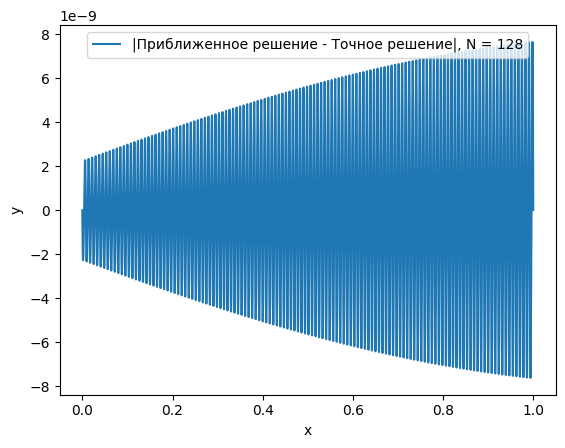

<Figure size 7680x5760 with 0 Axes>

In [10]:
def u_real(x):
    return 2 * (np.cos(1 - x) - np.sin(x)) / np.cos(1) + x ** 2 - 2

def f(x):
    return x ** 2

def u_real_square(x):
    return u_real(x) ** 2

def find_solution():
    K = np.zeros((2 * N + 1, 2 * N + 1))
    P = np.zeros((2 * N + 1, 2 * N + 1))
    A_P = np.array([[4, 2, -1], [2, 16, 2], [-1, 2,  4]]) * (Le / 30)
    A_K = np.array([[7, -8, 1], [-8, 16, -8], [1, -8, 7]]) / (3 * Le) - A_P
    for i in range(N):
        P[2 * i : 2 * i + 3, 2 * i : 2 * i + 3] -= A_P
        K[2 * i : 2 * i + 3, 2 * i : 2 * i + 3] += A_K
    K[0, 1:] = np.zeros(2 * N)
    P[0, :] = np.zeros(2 * N + 1)
    K[0, 0] = 1
    u = npl.solve(K, np.matmul(P, np.vectorize(f)(np.linspace(0, 1, 2 * N + 1))))
    return u, npl.cond(K)

def ErL2(Uh, Utr):
    num = 0
    denom = 0
    for i in range(len(Uh)):
        num += (Uh[i] - Utr[i]) ** 2
        denom += (Utr[i]) ** 2
    return np.sqrt(num/denom)

def ErInf(Uh, Utr):
    max1 = 0.0
    max2 = 0.0
    diff_u = Uh - Utr
    for i in range(0, len(Uh)):
        max1 = np.maximum(max1, np.abs(diff_u[i]))
        max2 = np.maximum(max2, np.abs(Utr[i]))
    return max1 / max2

def print_results(Uh, Utr, time, cond, L2prev, Infprev):
    L2 = ErL2(Uh, Utr)
    LInf = ErInf(Uh, Utr)
    RL2 = np.abs(np.log2(L2 / L2prev))
    RInf = np.abs(np.log2(LInf / Infprev))
    print("N = %d " % N + "Время: %s " % time + " Обусловленность матрицы: %e " % cond + " L2 = %e" % L2 + " Inf = %e" % LInf + " Сходимость L2 %e" % RL2 + " Сходимость Inf %e" % RInf)
    return L2, LInf


grid = [2 ** n for n in range(1, 8)]
L2prev = 0
Infprev = 0

for i in grid:
    start_time = time.time()
    N  = i
    Le = 1 / N
    u, cond_K = find_solution()
    X  = np.linspace(0, 1, N * 100 + 1)
    Xi = np.linspace(0, 1, 2 * N + 1)
    ξ  = np.linspace(-1, 1, 101)
    Uh = np.zeros(N * 100 + 1)

    Uh[0:100] = ξ[0:100] * (ξ[0:100] - 1) / 2 * u[0] + (1 - ξ[0:100]) * (1 + ξ[0:100]) * u[1] + ξ[0:100] * (ξ[0:100] + 1) / 2 * u[2]
    for i in range(1, N - 1):
        Uh[100 * i: 100 * (i + 1)] = ξ[0:100] * (ξ[0:100] - 1) / 2 * u[2 * i] + (1 - ξ[0:100]) * (1 + ξ[0:100]) * u[2 * i + 1] + ξ[0:100] * (ξ[0:100] + 1) / 2 * u[2 * i + 2]
    Uh[100 * (N - 1):] = ξ[0:101] * (ξ[0:101] - 1) / 2 * u[2 * N - 2] + (1 - ξ[0:101]) * (1 + ξ[0:101]) * u[2 * N - 1] + ξ[0:101] * (ξ[0:101] + 1) / 2 * u[2 * N]

    Utr = np.vectorize(u_real)(X)
    L2prev, Infprev = print_results(Uh, Utr, time.time() - start_time, cond_K, L2prev, Infprev)
    plt.plot(X, Uh - Utr, label='|Приближенное решение - Точное решение|, N = {N}'.format(N = N))
    leg = plt.legend(loc='upper center')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.figure(dpi=1200)
    plt.show()